<a href="https://colab.research.google.com/github/Anushree-B/Lie-detector/blob/main/Lie_detector_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Data/politifact_updated.csv")

In [3]:
df.head()

,Politician,Quote,Image URL,char_count,word_count,word_length,adv_count,adj_count,noun_count,verb_count,det_count,sentiment,named_entities_count
0,Kamala Harris,black women in the u s are three to four tim...,true,114,22,4.136364,1.0,4.0,6.0,2.0,1.0,-0.6326,1
1,Byron Donalds,kamala harris co sponsored fully sponsored ...,true,64,10,5.200000,1.0,2.0,1.0,4.0,1.0,0.0000,1
2,David Crowley,under the biden administration we have witne...,true,123,19,5.263158,0.0,5.0,4.0,3.0,2.0,0.3818,1
3,Tony Evers,wisconsin had a record breaking year for tou...,true,53,9,4.777778,0.0,0.0,5.0,1.0,1.0,0.0000,1
4,Social Media,under federal law former president donald tru...,true,105,17,5.117647,2.0,2.0,8.0,1.0,0.0,-0.6908,1


# Data preprocessing and cleaning

The target variable currently is Imahe URL, consisting of 6 truth values, converting that variable to Truth value having only 3 truth values

In [4]:
df['Image URL'] = df['Image URL'].map({"TRUE" : 0, "mostly-true" : 1, "half-true" : 2, "barely-true" :3, "FALSE": 4 , "pants-fire": 5})

In [5]:
df_new = df.copy()

In [6]:
mapping = {
    0: 0,
    1: 0,
    2: 1,
    3: 2,
    4: 2,
    5: 2
}

# Apply the mapping to the 'truth_value' column
df['Truth value'] = df['Image URL'].map(mapping)

Dropping unnecessary columns

In [7]:
df = df.drop(['char_count','Image URL'], axis = 1)

In [8]:
politicians_to_drop = ['Facebook posts','Viral image','Instagram posts','Bloggers','X posts','TikTok posts','Social Media']
df = df[~df['Politician'].isin(politicians_to_drop)]

In [9]:
politicians_to_keep = df['Politician'].value_counts()[df['Politician'].value_counts() > 150].index.tolist()
df = df[df['Politician'].isin(politicians_to_keep)]

In [10]:
df.shape

(1427, 12)

In [11]:
#df = df.drop(['Politician','Quote'], axis = 1)
df = df.drop(['Quote'], axis = 1)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Politician'] = le.fit_transform(df['Politician'])

In [13]:
df = df.drop(['Politician'], axis = 1)

In [14]:
df.head()

,word_count,word_length,adv_count,adj_count,noun_count,verb_count,det_count,sentiment,named_entities_count,Truth value
5,8,4.000000,0.0,1.0,4.0,1.0,1.0,-0.8591,0,NaN
18,11,5.181818,0.0,3.0,4.0,1.0,0.0,0.0000,1,NaN
65,18,4.500000,0.0,5.0,4.0,2.0,2.0,0.0000,4,NaN
75,33,4.969697,3.0,3.0,7.0,7.0,2.0,0.6808,2,NaN
79,29,5.862069,1.0,3.0,10.0,5.0,2.0,-0.7351,3,NaN


Checking outliers and removing them if necessary

<Axes: >

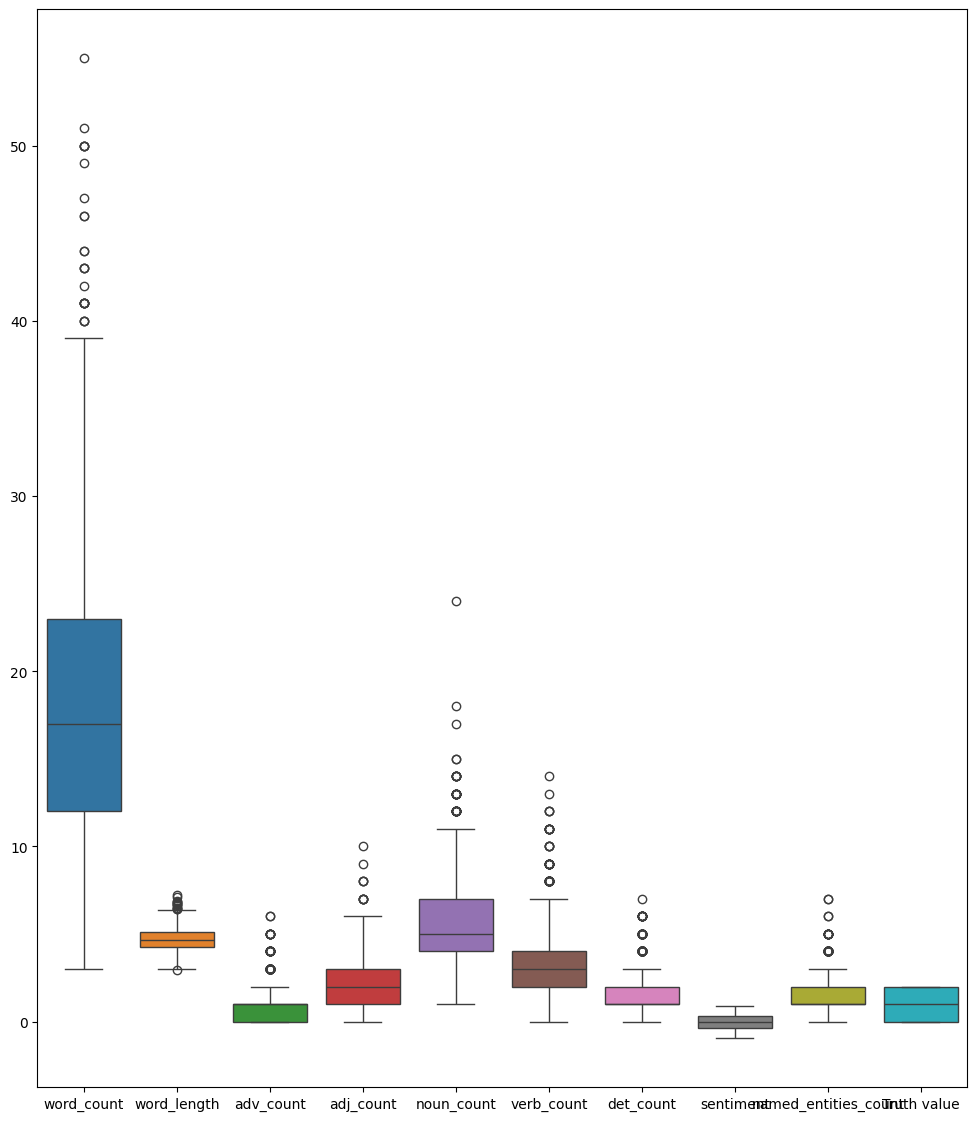

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,14))
sns.boxplot(df, ax = ax)

In [16]:
df = df.drop(df[df['word_count']>32].index)
df = df.drop(df[df['noun_count']>13].index)
df = df.drop(df[df['word_length']>6].index)
df = df.drop(df[df['verb_count']>7].index)
df = df.drop(df[df['adv_count']>2].index)
df = df.drop(df[df['word_length']<3].index)
df = df.drop(df[df['adj_count']>5].index)
df = df.drop(df[df['named_entities_count']>4].index)
df = df.drop(df[df['det_count']>3].index)

<Axes: >

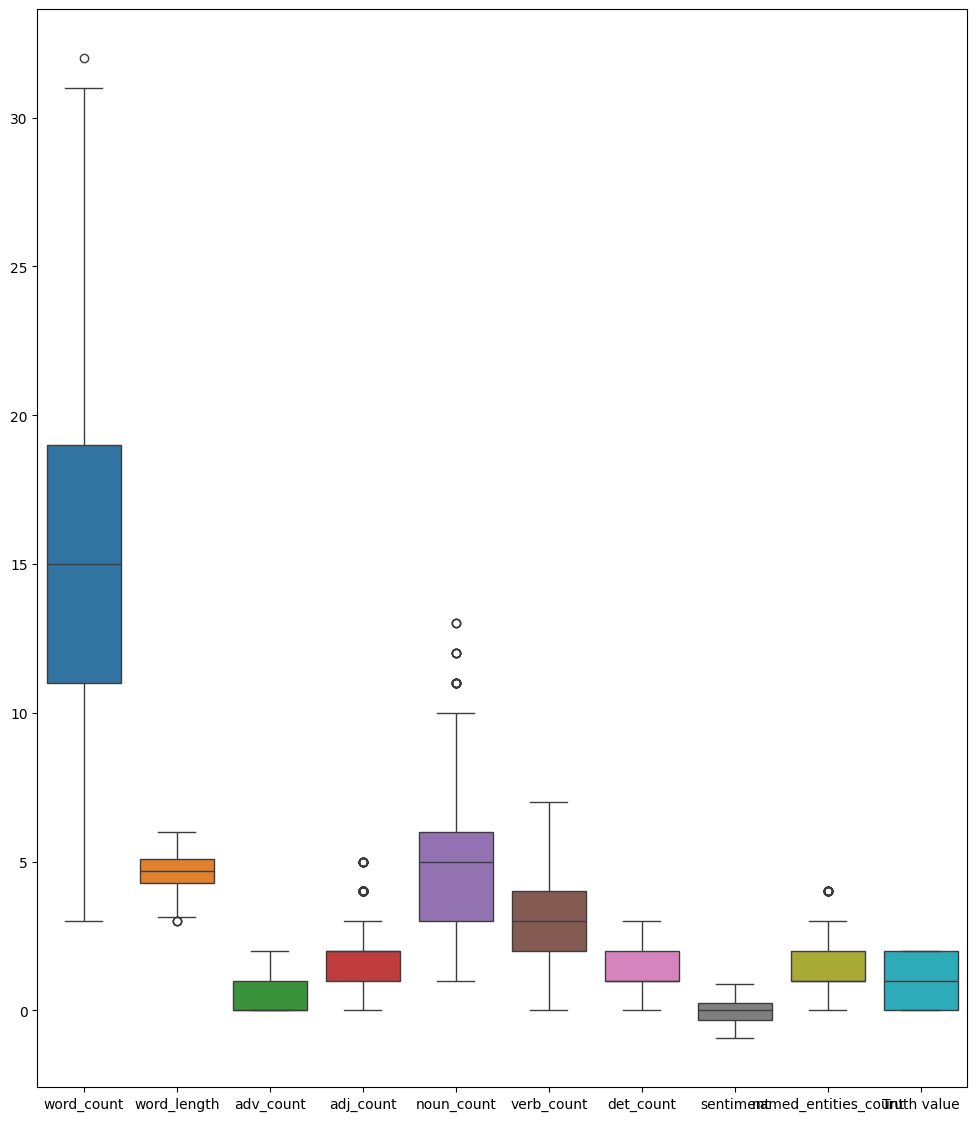

In [17]:
fig, ax = plt.subplots(figsize=(12,14))
sns.boxplot(df, ax = ax)

In [18]:
df['Truth value'].value_counts()

Truth value
2.0    394
0.0    256
1.0    243
Name: count, dtype: int64

In [19]:
x = df.drop(['Truth value'], axis=1)
y = df['Truth value']

In [20]:
x.head()

,word_count,word_length,adv_count,adj_count,noun_count,verb_count,det_count,sentiment,named_entities_count
5,8,4.000000,0.0,1.0,4.0,1.0,1.0,-0.8591,0
18,11,5.181818,0.0,3.0,4.0,1.0,0.0,0.0000,1
65,18,4.500000,0.0,5.0,4.0,2.0,2.0,0.0000,4
79,29,5.862069,1.0,3.0,10.0,5.0,2.0,-0.7351,3
105,14,4.714286,0.0,1.0,5.0,3.0,1.0,0.5719,1


In [21]:
df.to_csv("Data/politifact_cleaned.csv",index=False)